# Première classification

L'objectif ici est d'utiliser un premier classifier. Pour commencer nous prendrons SVM qui obtient souvent de bons résultats sur les données textuelles.

Nous pouvons donc, pour simplifier, créer un jeu d'apprentissage et un jeu de test et évaluer le résultat d'un classifieur SVM placé dans un pipeline.

In [1]:
from pretraitement import TextPreTraitement
from clean import clean_claimKG
from classification import trueVSfalse, trueFalseVSmixture, trueVSfalseVSmixture, cut_data
from utilities import plot_confusion_matrix

import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression

In [ ]:
file_name = "../data/claimKG.csv"
origin = pd.read_csv(file_name)

In [ ]:
origin = clean_claimKG(origin, verbose=False, inplace=True)

kg = origin.copy()

Pour un premier test, nous allons prendre comme `X` les assertions et `Y` les valeurs de véracité.

Note: les valeurs de véracité ne sont pour l'instant pas disponible, à voir ou les trouver.

Donc, pour l'instant, on ne garde que les lignes qu'on peut exploiter.

In [ ]:
kg = trueVSfalse(origin)
labels=['False','True']
print(kg['ratingValue'].value_counts())

In [19]:
kg = cut_data(kg)
print(kg['ratingValue'].value_counts())

0    4584
1    4584
Name: ratingValue, dtype: int64


Création d'un jeu d'apprentissage et de test

In [20]:
X=kg['claimReview_claimReviewed']
y=kg['ratingValue']

X_train,X_test,y_train,y_test=train_test_split(X, y, 
                                               train_size=0.7 ,
                                               random_state=30,stratify=y)

In [6]:
vectorizer = TfidfVectorizer(
            lowercase=False,
            ngram_range=(1,2),
            tokenizer=None,
            preprocessor=lambda x:x,
            min_df=0.01, 
            max_df=0.9)

Création du pipeline

In [21]:
pipe = Pipeline([("cleaner", TextPreTraitement(stopword=True)),
                 ("count_vectorizer", vectorizer),
                 ("SVM", LogisticRegression(solver='lbfgs'))])
pipe.fit(X_train,y_train)

print("pipeline créé")

pipeline créé


On teste le modèle

In [22]:
y_pred = pipe.predict(X_test)

print("train accuracy:",accuracy_score(y_train, pipe.predict(X_train)))
print("test accuracy:",accuracy_score(y_test, y_pred))


train accuracy: 0.7026647966339411
test accuracy: 0.6441294074881861


[[1195  180]
 [ 799  577]]


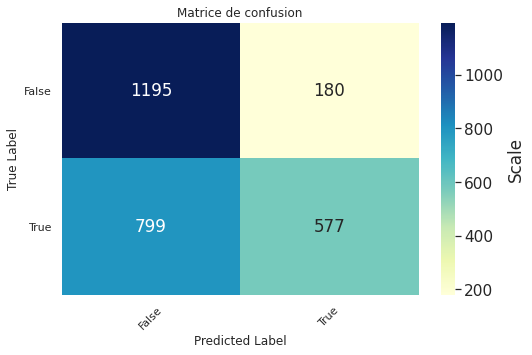

              precision    recall  f1-score   support

           0       0.60      0.87      0.71      1375
           1       0.76      0.42      0.54      1376

    accuracy                           0.64      2751
   macro avg       0.68      0.64      0.63      2751
weighted avg       0.68      0.64      0.63      2751



In [23]:
confMatrix = confusion_matrix(y_test, y_pred)
print(confMatrix)
plot_confusion_matrix(confMatrix, labels)

print(classification_report(y_test, y_pred))